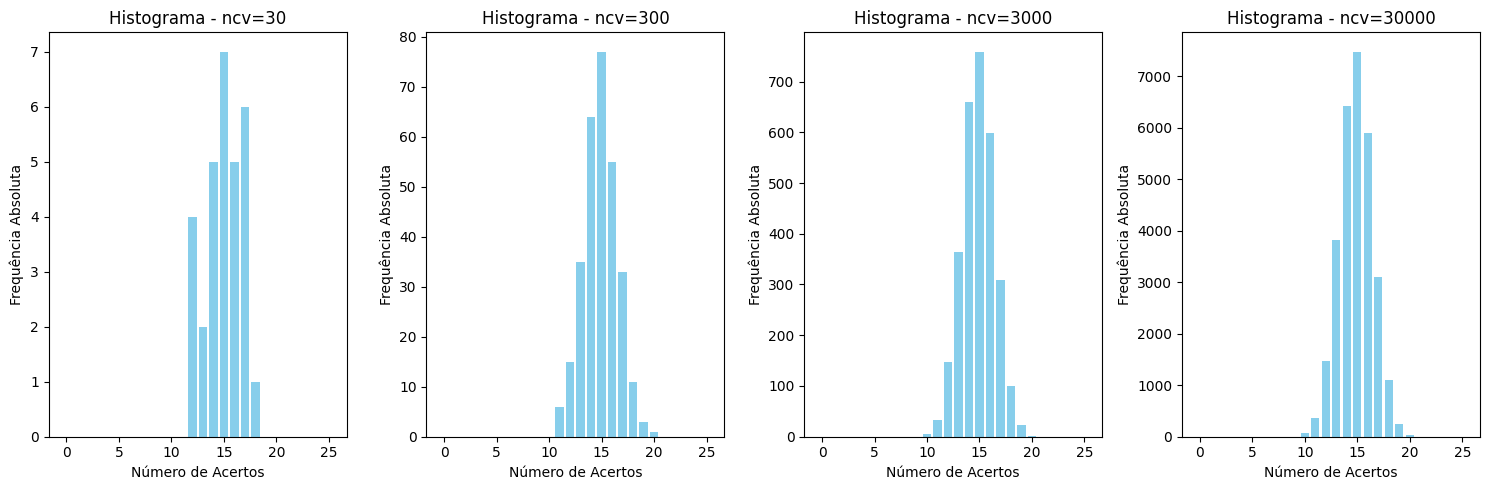

     ncv  Cartelas com Maior Número de Acertos  \
0     30                                     1   
1    300                                     1   
2   3000                                     1   
3  30000                                     4   

   Cartelas com Menor Número de Acertos  
0                                     4  
1                                     6  
2                                     5  
3                                     3  

Tabela de Frequências Absolutas para cada ncv:
                   ncv=30  ncv=300  ncv=3000  ncv=30000
Número de Acertos                                      
0                     0.0      0.0       0.0        0.0
1                     0.0      0.0       0.0        0.0
2                     0.0      0.0       0.0        0.0
3                     0.0      0.0       0.0        0.0
4                     0.0      0.0       0.0        0.0
5                     0.0      0.0       0.0        0.0
6                     0.0      0.0       0.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Definindo o número de sorteios (n_sorteio) globalmente
n_sorteio = 25  # Número de números sorteados
n_cartela = 25  # Número de números por cartela
num_max = 42  # Maior número possível (1 a 42)

# Função para gerar cartelas com números aleatórios
def gerar_cartela(n_cartela=n_cartela, num_max=num_max):
    return np.random.choice(range(1, num_max + 1), size=n_cartela, replace=False)

# Função para gerar os números sorteados
def gerar_sorteio(n_sorteio=n_sorteio, num_max=num_max):
    return np.random.choice(range(1, num_max + 1), size=n_sorteio, replace=False)

# Função para simular o jogo
def simular_tele_sena(ncv, n_cartela=n_cartela, n_sorteio=n_sorteio, num_max=num_max):
    # Gerando as cartelas
    cartelas = np.array([gerar_cartela(n_cartela, num_max) for _ in range(ncv)])

    # Gerando o sorteio
    sorteio = gerar_sorteio(n_sorteio, num_max)

    # Calculando o número de acertos por cartela
    acertos = [len(np.intersect1d(cartela, sorteio)) for cartela in cartelas]

    # Contagem dos acertos
    acertos_contagem = np.zeros(n_sorteio + 1)
    for acerto in acertos:
        acertos_contagem[acerto] += 1

    return acertos_contagem, acertos

# Lista de valores de ncv a serem simulados
ncv_values = [30, 300, 3000, 30000]

# Inicializando os gráficos e tabela de resultados
fig, ax = plt.subplots(1, 4, figsize=(15, 5))
tabela_resultados = []
frequencia_absoluta_por_ncv = {}

for i, ncv in enumerate(ncv_values):
    # Simulando o jogo para o valor de ncv
    acertos_contagem, acertos = simular_tele_sena(ncv)

    # Histograma da Frequência Absoluta
    ax[i].bar(range(n_sorteio + 1), acertos_contagem, color='skyblue')
    ax[i].set_title(f'Histograma - ncv={ncv}')
    ax[i].set_xlabel('Número de Acertos')
    ax[i].set_ylabel('Frequência Absoluta')

    # Contabilizando cartelas com o maior e menor número de acertos
    max_acertos = max(acertos)
    min_acertos = min(acertos)

    cartelas_max = acertos.count(max_acertos)
    cartelas_min = acertos.count(min_acertos)

    tabela_resultados.append([ncv, cartelas_max, cartelas_min])

    # Adicionando dados de frequências absolutas para cada ncv
    frequencia_absoluta_por_ncv[ncv] = acertos_contagem

# Exibindo os histogramas
plt.tight_layout()
plt.show()

# Criando a tabela de resultados
tabela = pd.DataFrame(tabela_resultados, columns=['ncv', 'Cartelas com Maior Número de Acertos', 'Cartelas com Menor Número de Acertos'])

# Exibindo a tabela com as frequências absolutas para cada ncv
frequencia_absoluta_df = pd.DataFrame(frequencia_absoluta_por_ncv)
frequencia_absoluta_df.columns = [f'ncv={ncv}' for ncv in frequencia_absoluta_df.columns]
frequencia_absoluta_df.index.name = 'Número de Acertos'

# Exibindo as tabelas
print(tabela)
print("\nTabela de Frequências Absolutas para cada ncv:")
print(frequencia_absoluta_df)
